# (Ford GoBike System Data Exploration)
## by (Duaa Algethami)

> In this project, I will perform an exploratory analysis on data provided by Ford GoBike, a bike-share system provider.
Ford GoBike is covering the greater San Francisco Bay Area, California. The bikes can be unlocked from one station and returned to any other station in the system. Riders have access to all bikes in the network when they become a member or purchase a pass.
The source data (Ford GoBike System Data) is available at https://s3.amazonaws.com/baywheels-data/index.html.


## Preliminary Wrangling

> The dataset used for this exploratory analysis by joining multiple data files consists of monthly individual trip data from Jan 2018 to May 2019.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
from requests import get
from zipfile import ZipFile
from io import StringIO, BytesIO

%matplotlib inline

In [2]:
links = ["https://s3.amazonaws.com/baywheels-data/201801-fordgobike-tripdata.csv.zip","https://s3.amazonaws.com/baywheels-data/201802-fordgobike-tripdata.csv.zip"
        ,"https://s3.amazonaws.com/baywheels-data/201803-fordgobike-tripdata.csv.zip","https://s3.amazonaws.com/baywheels-data/201804-fordgobike-tripdata.csv.zip"
        ,"https://s3.amazonaws.com/baywheels-data/201805-fordgobike-tripdata.csv.zip","https://s3.amazonaws.com/baywheels-data/201806-fordgobike-tripdata.csv.zip"
        ,"https://s3.amazonaws.com/baywheels-data/201807-fordgobike-tripdata.csv.zip","https://s3.amazonaws.com/baywheels-data/201808-fordgobike-tripdata.csv.zip"
        ,"https://s3.amazonaws.com/baywheels-data/201809-fordgobike-tripdata.csv.zip","https://s3.amazonaws.com/baywheels-data/201810-fordgobike-tripdata.csv.zip"
        ,"https://s3.amazonaws.com/baywheels-data/201811-fordgobike-tripdata.csv.zip","https://s3.amazonaws.com/baywheels-data/201812-fordgobike-tripdata.csv.zip"
        ,"https://s3.amazonaws.com/baywheels-data/201901-fordgobike-tripdata.csv.zip","https://s3.amazonaws.com/baywheels-data/201902-fordgobike-tripdata.csv.zip"
        ,"https://s3.amazonaws.com/baywheels-data/201903-fordgobike-tripdata.csv.zip","https://s3.amazonaws.com/baywheels-data/201904-fordgobike-tripdata.csv.zip"
        ,"https://s3.amazonaws.com/baywheels-data/201905-baywheels-tripdata.csv.zip"]

for link in links:
    zipfile = get(link)
    with ZipFile(BytesIO(zipfile.content)) as file:
        file.extractall()

In [3]:
paths = ['201802-fordgobike-tripdata.csv','201803-fordgobike-tripdata.csv'
        ,'201804-fordgobike-tripdata.csv','201805-fordgobike-tripdata.csv'
        ,'201806-fordgobike-tripdata.csv','201807-fordgobike-tripdata.csv'
        ,'201808-fordgobike-tripdata.csv','201809-fordgobike-tripdata.csv'
        ,'201810-fordgobike-tripdata.csv','201811-fordgobike-tripdata.csv'
        ,'201812-fordgobike-tripdata.csv','201901-fordgobike-tripdata.csv'
        ,'201902-fordgobike-tripdata.csv','201903-fordgobike-tripdata.csv'
        ,'201904-fordgobike-tripdata.csv','201905-baywheels-tripdata.csv']

df_bike = pd.read_csv('201801-fordgobike-tripdata.csv')
for path in paths:
    df_bike = df_bike.append(pd.read_csv(path))

In [4]:
df_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No


In [5]:
df_bike.to_csv('df_bike.csv') 

In [6]:
df = pd.read_csv("df_bike.csv")

In [7]:
print(df.shape)
print(df.dtypes)

(2916788, 15)
Unnamed: 0                   int64
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
bike_share_for_all_trip     object
dtype: object


## Cleaning Data

In [8]:
bike_clean = df.copy()

In [9]:
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916788 entries, 0 to 2916787
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Unnamed: 0               int64  
 1   duration_sec             int64  
 2   start_time               object 
 3   end_time                 object 
 4   start_station_id         float64
 5   start_station_name       object 
 6   start_station_latitude   float64
 7   start_station_longitude  float64
 8   end_station_id           float64
 9   end_station_name         object 
 10  end_station_latitude     float64
 11  end_station_longitude    float64
 12  bike_id                  int64  
 13  user_type                object 
 14  bike_share_for_all_trip  object 
dtypes: float64(6), int64(3), object(6)
memory usage: 333.8+ MB


### bike_clean 

#### Define
1. change start_time and end_time to timestamp

#### code

In [10]:
bike_clean.start_time = pd.to_datetime(bike_clean.start_time)
bike_clean.end_time = pd.to_datetime(bike_clean.end_time)

#### Test

In [11]:
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916788 entries, 0 to 2916787
Data columns (total 15 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   Unnamed: 0               int64         
 1   duration_sec             int64         
 2   start_time               datetime64[ns]
 3   end_time                 datetime64[ns]
 4   start_station_id         float64       
 5   start_station_name       object        
 6   start_station_latitude   float64       
 7   start_station_longitude  float64       
 8   end_station_id           float64       
 9   end_station_name         object        
 10  end_station_latitude     float64       
 11  end_station_longitude    float64       
 12  bike_id                  int64         
 13  user_type                object        
 14  bike_share_for_all_trip  object        
dtypes: datetime64[ns](2), float64(6), int64(3), object(4)
memory usage: 333.8+ MB


#### Define
2. start_station_id, end_station_id and bike_id to strings

#### code

In [12]:
bike_clean['start_station_id'] = bike_clean['start_station_id'].astype(np.object)
bike_clean['end_station_id'] = bike_clean['end_station_id'].astype(np.object)
bike_clean['bike_id'] = bike_clean['bike_id'].astype(np.object)

#### Test

In [13]:
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916788 entries, 0 to 2916787
Data columns (total 15 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   Unnamed: 0               int64         
 1   duration_sec             int64         
 2   start_time               datetime64[ns]
 3   end_time                 datetime64[ns]
 4   start_station_id         object        
 5   start_station_name       object        
 6   start_station_latitude   float64       
 7   start_station_longitude  float64       
 8   end_station_id           object        
 9   end_station_name         object        
 10  end_station_latitude     float64       
 11  end_station_longitude    float64       
 12  bike_id                  object        
 13  user_type                object        
 14  bike_share_for_all_trip  object        
dtypes: datetime64[ns](2), float64(4), int64(2), object(7)
memory usage: 333.8+ MB


#### Define
3. user_type should be categorical

#### code

In [14]:
bike_clean['user_type'] = bike_clean['user_type'].astype('category')

#### Test

In [15]:
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916788 entries, 0 to 2916787
Data columns (total 15 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   Unnamed: 0               int64         
 1   duration_sec             int64         
 2   start_time               datetime64[ns]
 3   end_time                 datetime64[ns]
 4   start_station_id         object        
 5   start_station_name       object        
 6   start_station_latitude   float64       
 7   start_station_longitude  float64       
 8   end_station_id           object        
 9   end_station_name         object        
 10  end_station_latitude     float64       
 11  end_station_longitude    float64       
 12  bike_id                  object        
 13  user_type                category      
 14  bike_share_for_all_trip  object        
dtypes: category(1), datetime64[ns](2), float64(4), int64(2), object(6)
memory usage: 314.3+ MB


#### Define
4. Rows that containe nulls should be removed 

#### code

In [16]:
bike_clean = bike_clean[bike_clean['start_station_id'].isnull() == False]

In [17]:
bike_clean = bike_clean[bike_clean['end_station_id'].isnull() == False]

In [18]:
bike_clean = bike_clean[bike_clean['start_station_name'].isnull() == False]

In [19]:
bike_clean = bike_clean[bike_clean['end_station_name'].isnull() == False]

#### Test

In [20]:
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2904272 entries, 0 to 2916787
Data columns (total 15 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   Unnamed: 0               int64         
 1   duration_sec             int64         
 2   start_time               datetime64[ns]
 3   end_time                 datetime64[ns]
 4   start_station_id         object        
 5   start_station_name       object        
 6   start_station_latitude   float64       
 7   start_station_longitude  float64       
 8   end_station_id           object        
 9   end_station_name         object        
 10  end_station_latitude     float64       
 11  end_station_longitude    float64       
 12  bike_id                  object        
 13  user_type                category      
 14  bike_share_for_all_trip  object        
dtypes: category(1), datetime64[ns](2), float64(4), int64(2), object(6)
memory usage: 335.1+ MB


#### Define
5. add new columns for trip duration in minute, trip start date in yyyy-mm-dd format, trip start hour of the day, day of week and month

#### code

In [21]:
bike_clean['duration_min'] = bike_clean['duration_sec']/60

bike_clean['start_time_month'] = bike_clean.start_time.dt.month.astype(int)

bike_clean['start_hour'] = bike_clean.start_time.dt.strftime('%H').astype(int)
bike_clean['start_day'] = bike_clean.start_time.dt.strftime('%a')

bike_clean['start_time_year_month'] = bike_clean.start_time.dt.strftime('%Y-%m')

#### Test

In [22]:
bike_clean.head()

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,duration_min,start_time_month,start_hour,start_day,start_time_year_month
0,0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No,1254.733333,1,22,Wed,2018-01
1,1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No,1423.700000,1,16,Wed,2018-01
2,2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No,1192.933333,1,14,Wed,2018-01
3,3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,No,1017.933333,1,14,Wed,2018-01
4,4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No,666.100000,1,19,Wed,2018-01


In [23]:
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2904272 entries, 0 to 2916787
Data columns (total 20 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   Unnamed: 0               int64         
 1   duration_sec             int64         
 2   start_time               datetime64[ns]
 3   end_time                 datetime64[ns]
 4   start_station_id         object        
 5   start_station_name       object        
 6   start_station_latitude   float64       
 7   start_station_longitude  float64       
 8   end_station_id           object        
 9   end_station_name         object        
 10  end_station_latitude     float64       
 11  end_station_longitude    float64       
 12  bike_id                  object        
 13  user_type                category      
 14  bike_share_for_all_trip  object        
 15  duration_min             float64       
 16  start_time_month         int32         
 17  start_hour               in

### What is the structure of your dataset?

> There are 2916788 row in the dataset with 15 columns.

> Each trip includes:
- Trip Duration (min)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type

### What is/are the main feature(s) of interest in your dataset?

> - User Type 
> - Trip Duration (min)

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> - start_time (month, day, hour)              
> - Start Station Latitude
> - Start Station Longitude
> - End Station Latitude
> - End Station Longitude

## Univariate Exploration

#### Distribution of Trip Duration

Text(0, 0.5, 'Trips Count')

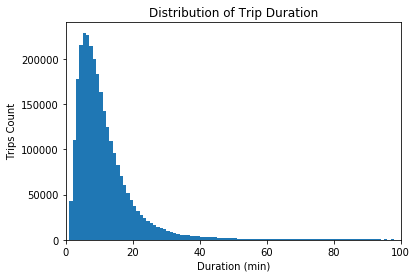

In [24]:
bin_edges = np.arange(0, bike_clean['duration_min'].max()+1, 1)
sb.distplot(bike_clean['duration_min'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})
plt.xlim(0,100)
plt.title('Distribution of Trip Duration')
plt.xlabel('Duration (min)')
plt.ylabel('Trips Count')

We can visualize that the the above plot is right-screwed, the duration distribution spans pretty far to the right.

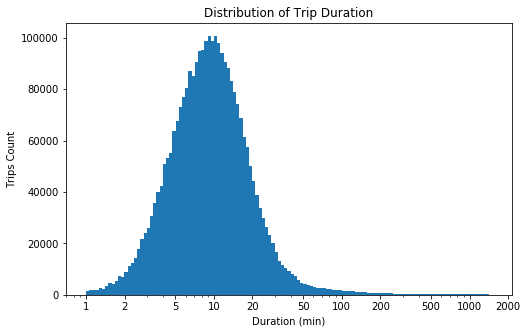

In [25]:
bin_edges = 10 ** np.arange(0, np.log10(bike_clean['duration_min'].max())+0.025, 0.025)
plt.figure(figsize=[8, 5]);
plt.hist(data = bike_clean, x='duration_min', bins = bin_edges)
plt.xscale('log')
tick_locs = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000];
plt.xticks(tick_locs, tick_locs)
plt.title('Distribution of Trip Duration')
plt.xlabel('Duration (min)')
plt.ylabel('Trips Count')
plt.show()

After makeing logarithmic transformation we can see from the above plot that the majority of riders have a tendency toward  a short-time trips (around 10 mins).

#### A Histogram for User Type

Text(0, 0.5, 'count')

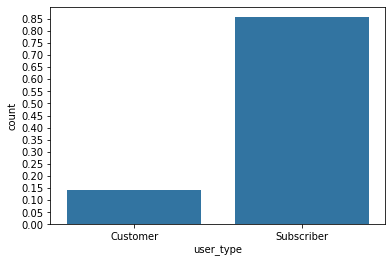

In [26]:
# get proportion taken by most common group for derivation
# of tick marks
n_points = bike_clean.shape[0]
max_count = bike_clean['user_type'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = bike_clean, x = 'user_type', color = base_color)
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('count')

Most riders were subscribers

#### Percentage of user type

In [27]:
trip_df = bike_clean.groupby('user_type').agg({'bike_id':'count'})


In [28]:
trip_df['perc'] = (trip_df['bike_id']/trip_df['bike_id'].sum())*100


(0, 100)

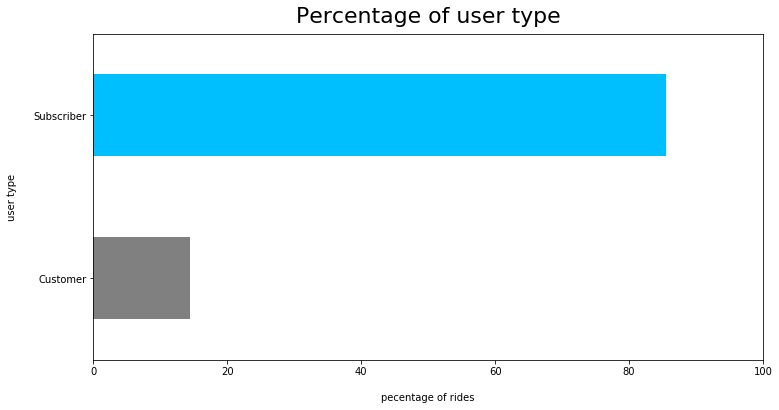

In [29]:
new_color = ['gray', 'deepskyblue', 'pink']
trip_df['perc'].plot(kind='barh', color=new_color, figsize=(12,6))
plt.title('Percentage of user type', fontsize=22, y=1.015)
plt.ylabel('user type', labelpad=16)
plt.xlabel('pecentage of rides', labelpad=16)
plt.xticks(rotation=360)
plt.xlim(0,100)

#### Daily Trips Trend

In [30]:
weekdays = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
bike_clean['start_day'] = bike_clean['start_day'].astype(ordered_weekdays)

In [31]:
bike_clean1 = bike_clean.groupby('start_day').agg({'bike_id':'count'}).reset_index()

Text(0, 0.5, 'Trips count')

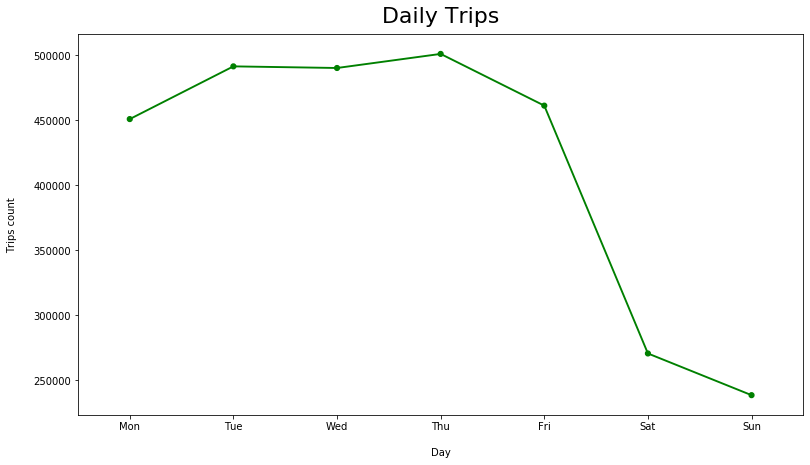

In [32]:
plt.figure(figsize=(13,7))
sns.pointplot(x='start_day', y='bike_id', scale=.7, color='green', data=bike_clean1)
plt.title('Daily Trips', fontsize=22, y=1.015)
plt.xlabel('Day', labelpad=16)
plt.ylabel('Trips count', labelpad=16)

The highest number of trips was on Turesday. 

#### Hourly Trips Trend

In [33]:
bike_clean2 = bike_clean.groupby('start_hour').agg({'bike_id':'count'}).reset_index()

Text(0, 0.5, 'Trips count')

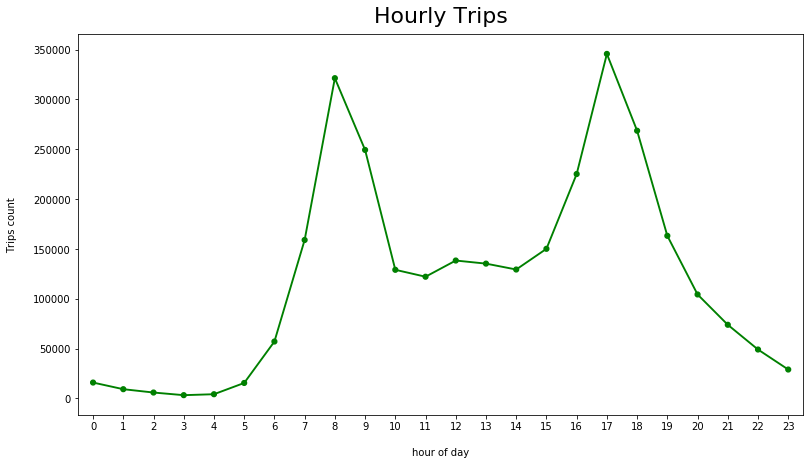

In [34]:
plt.figure(figsize=(13,7))
sns.pointplot(x='start_hour', y='bike_id', scale=.7, color='green', data=bike_clean2)
plt.title('Hourly Trips', fontsize=22, y=1.015)
plt.xlabel('hour of day', labelpad=16)
plt.ylabel('Trips count', labelpad=16)

Most trips were peaked during rush hours of a day.

#### Monthly Trips Trend

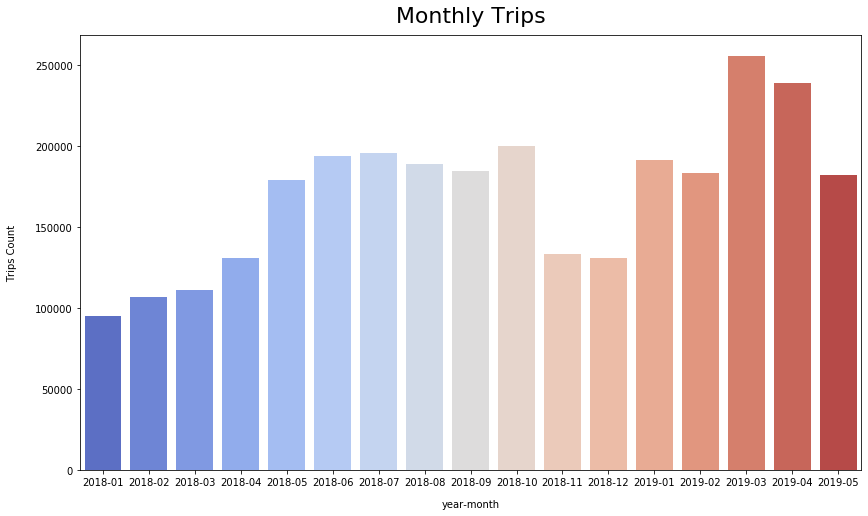

In [35]:
# monthly usege of the bike sharing system
plt.figure(figsize=(14,8))
sns.countplot(x='start_time_year_month', palette="coolwarm", data=bike_clean.sort_values(by='start_time_year_month'))
plt.title('Monthly Trips', fontsize=22, y=1.015)
plt.xlabel('year-month', labelpad=12)
plt.ylabel('Trips Count', labelpad=18)
ax = plt.gca()
plt.savefig('img02.png')

GoFord Bike is getting popular in 2019, the plot shows that January 2019 trips increased almost twice the number of trips in January 2018.


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I have checked (Trip duration, daily, hourly and monthly trend of Trips, weekdays or weekends comparision, user types percentage etc.) 

> Datafinding were:
- There were almost 3  million rides.
- Subscribers took around %85 of all bike rides, and customers took around %15 of them.
- People use the system heavily on weekdays.
- The usage peaked at 8am and 5pm. Also, people use the system in the afternoon.


>I used log scale for duration_min to get a uniform distribution


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distribution of the trip duration was at first extremely difficult. I used xlim() to zoom in to where most trip records fell, which made the distribution much easier to visualize.
Trip duration secondes (duration_sec) was converted to (duration_min) since it seems reasonable to measure the trip duration by minutes.

## Bivariate Exploration

#### Duration against Four Seasons

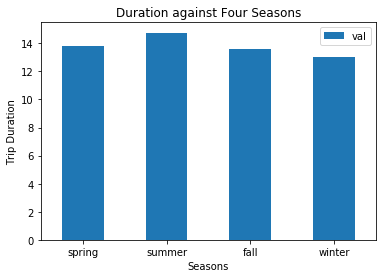

In [36]:
spring = bike_clean.query('start_time_month in ["3" , "4" , "5"]' )['duration_min'].mean ()
summer = bike_clean.query('start_time_month in ["6" , "7" , "8"] ')['duration_min'].mean()
fall = bike_clean.query('start_time_month in ["9" , "10" , "11"] ')['duration_min'].mean()
winter = bike_clean.query('start_time_month in ["12" , "1" , "2"]' )['duration_min'].mean()

Seasons_df = pd.DataFrame({'Seasons':['spring','summer','fall','winter'], 'val':[spring , summer , fall , winter]})
ax = Seasons_df.plot.bar(x='Seasons', y='val', rot=0)

plt.title('Duration against Four Seasons')
plt.xlabel('Seasons')
plt.ylabel('Trip Duration');

Does weather impact the trip duration?
- The plot showes that there is a seasonality, rides take longer trips in the summer season compared to other seasons.

#### Average trip duration per user type

Text(0.5, 0, 'Trip duration (min)')

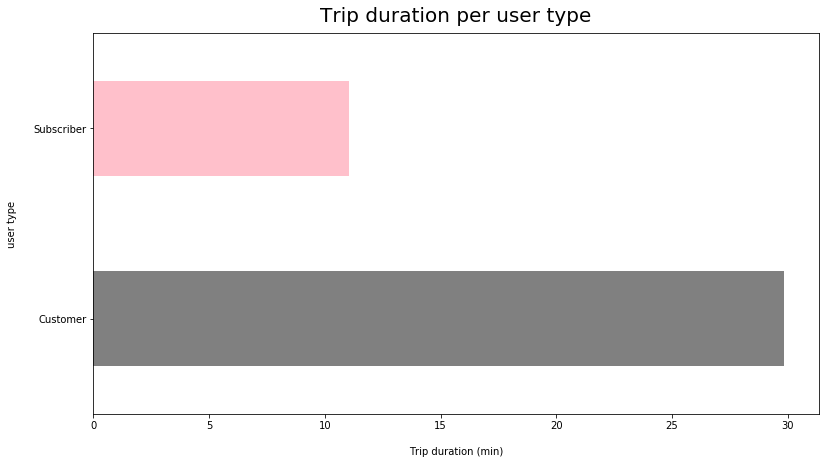

In [37]:
new_color=['gray', 'pink']
ax = bike_clean.groupby('user_type')['duration_min'].mean().plot(kind='barh', color=new_color, figsize=(13,7))
ax.set_title('Trip duration per user type', fontsize=20, y=1.015)
ax.set_ylabel('user type', labelpad=16)
ax.set_xlabel('Trip duration (min)', labelpad=16)

Customer trip duration is around 30 minutes while most subscribers trips take around 12 minutes in average. Although subscribers are more than customers, we can see that customer rides longer than subscriber.

#### Monthly Trend Per User Type

In [38]:
user_type_count_per_month_df = bike_clean.groupby(["start_time_year_month","user_type"]).size().reset_index()

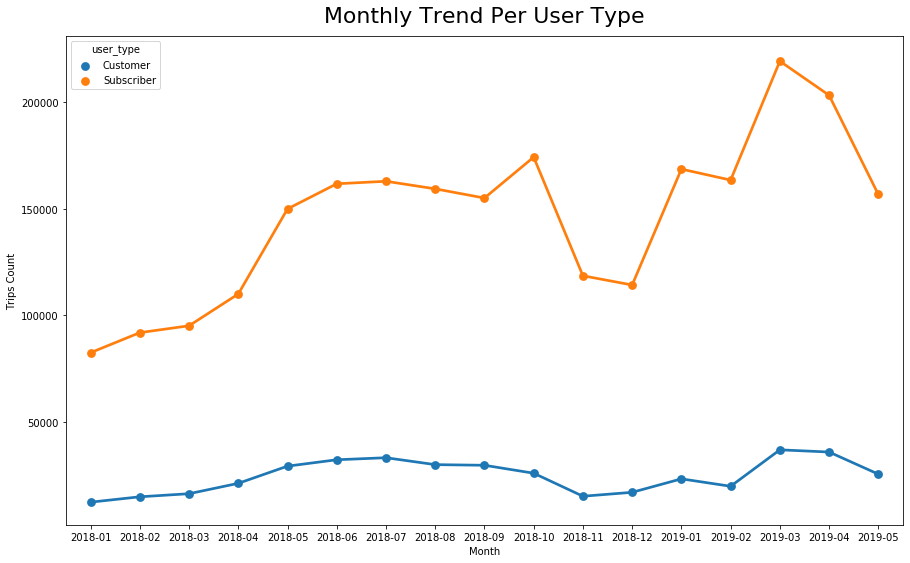

In [39]:
plt.figure(figsize = [15, 9]);

ax = sns.pointplot(x="start_time_year_month", y=0, hue="user_type",
                data= user_type_count_per_month_df)
plt.title('Monthly Trend Per User Type', fontsize=22, y=1.015)
plt.xlabel('Month');
plt.ylabel('Trips Count');

Customers' rides seems increasing slightly. There is a decrease on November 2018 for subscribers but it seems like it is related with winter season.

#### Daily and Hourly Trend per User Type

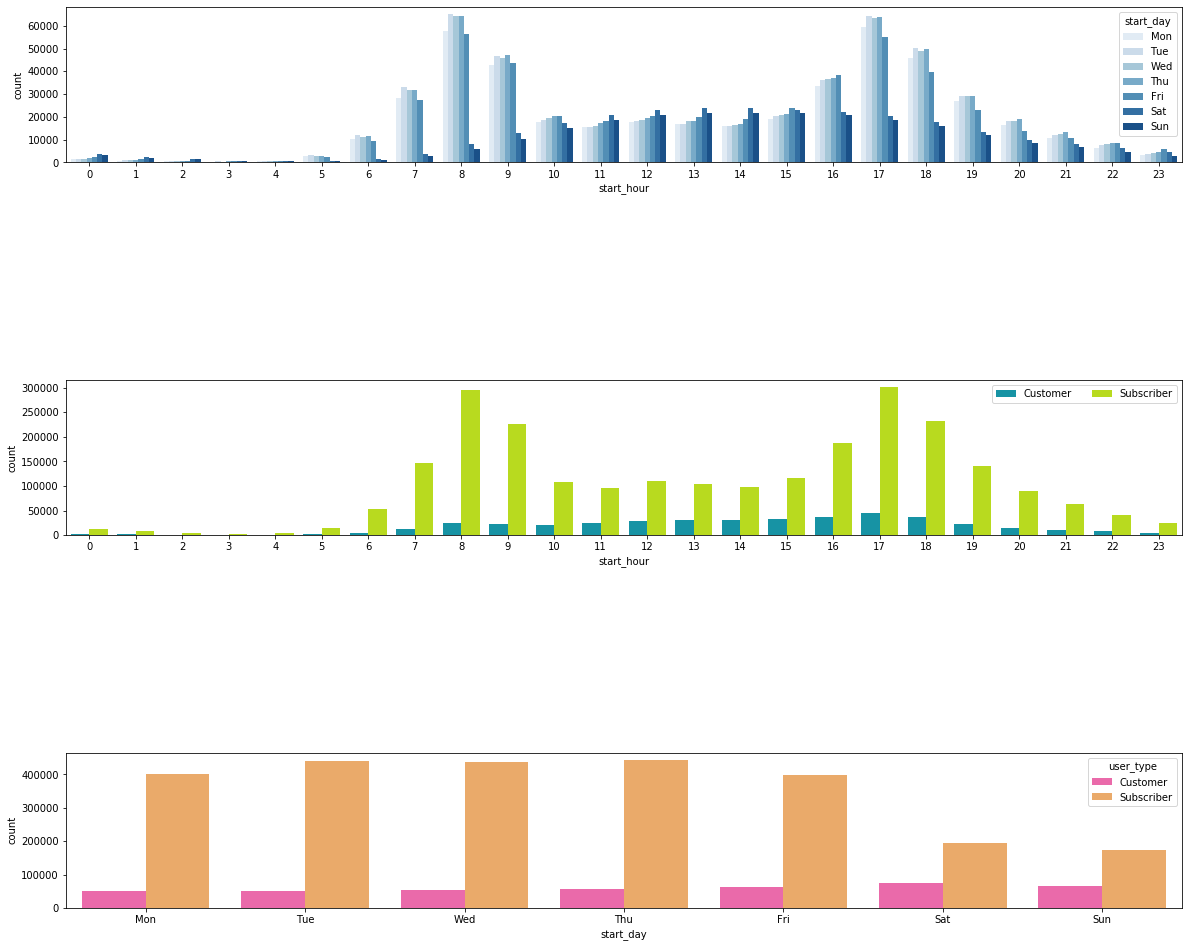

In [40]:
plt.figure(figsize = [20, 20]);


plt.subplot(6, 1, 1);
sb.countplot(data = bike_clean, x = 'start_hour', hue = 'start_day', palette = 'Blues');


ax = plt.subplot(6, 1, 3);
sb.countplot(data = bike_clean, x = 'start_hour', hue = 'user_type', palette = 'nipy_spectral');
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping


ax = plt.subplot(6, 1, 5);
sb.countplot(data = bike_clean, x = 'start_day', hue = 'user_type', palette = 'spring');


Subscribers usage is comparable during the week while it gose down on the weekend whereas customers ride a lot on weekends. Obviously, the rush hours has an impact where many subscribers' trips concentrated at 8am and 5pm on work days.
Customers trips concentrated between 11am and 2pm on the weekend, yet they use the system after 5pm on work days.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> - To check the seasonality, I genarated a new field called seasons by filtering out months of each season with .query().
> - Subscriber usage of the system is very higher and longer than customers.
> - Subscribers use the system for work commnute, while customers use it for fun over weekends.
> - Summer has the longest trip duration.
> - There is a decrease in subscribers rides related with winter season.



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>- March had the most bike riding usage for subscribers throughout the year.
>- For user type, subscribers ride more but they take shorter trip duration than customer.


## Multivariate Exploration

#### Trip Duration Against Day and User Type

In [41]:
# compute the logarithm of price to make multivariate plotting easier
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

bike_clean['log_duration_min'] = bike_clean['duration_min'].apply(log_trans)

In [42]:
weekdays = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
bike_clean['start_day'] = bike_clean['start_day'].astype(ordered_weekdays)

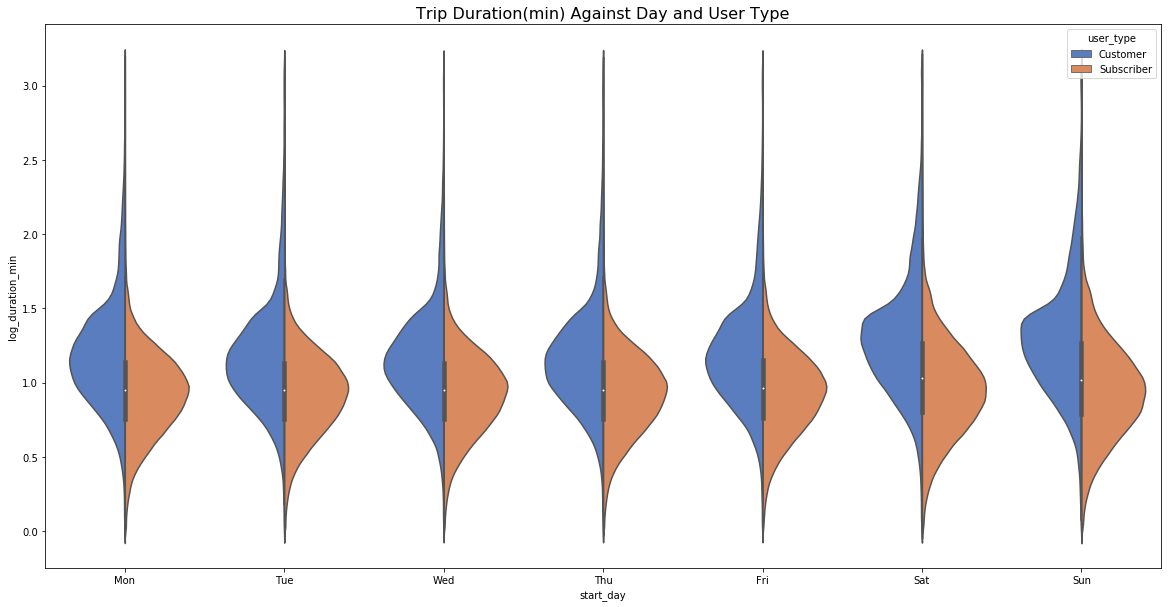

In [43]:
plt.figure(figsize = [20, 10]);

ax = sns.violinplot(x="start_day", y="log_duration_min", hue="user_type", split=True, palette="muted",data=bike_clean)
ax.set_title('Trip Duration(min) Against Day and User Type', fontsize=16);

From the above plots, we can conclude that the Customers have a tendency to rent out the bikes for longer trips on each day of the week.

#### Distance Against Day and User Type

In [44]:
from math import radians, cos, sin, asin, sqrt 
def distance(lat1, lat2, lon1, lon2): 
      
    # The math module contains a function named 
    # radians which converts from degrees to radians. 
    lon1 = radians(lon1) 
    lon2 = radians(lon2) 
    lat1 = radians(lat1) 
    lat2 = radians(lat2) 
       
    # Haversine formula  
    dlon = lon2 - lon1  
    dlat = lat2 - lat1 
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  
    c = 2 * asin(sqrt(a))  
     
    # Radius of earth in kilometers. Use 3956 for miles 
    r = 6371
       
    # calculate the result 
    distance = r * c
    return np.float64(round(distance))

#https://www.geeksforgeeks.org/program-distance-two-points-earth/

In [45]:
bike_clean['distance'] = bike_clean.apply(lambda x: distance(x['start_station_latitude'],x['start_station_longitude'],x['end_station_latitude'],x['end_station_longitude']),axis=1)

In [46]:
bike_clean['distance']

0          10761.0
1          10769.0
2          10789.0
3          10764.0
4          10763.0
            ...   
2916783    10762.0
2916784    10793.0
2916785    10762.0
2916786    10793.0
2916787    10786.0
Name: distance, Length: 2904272, dtype: float64

In [47]:
q3 = bike_clean["distance"].quantile(0.75)
q1 = bike_clean["distance"].quantile(0.25)

In [48]:
iqr = q3 - q1

In [49]:
q3

10784.0

In [50]:
q1

10764.0

In [51]:
iqr

20.0

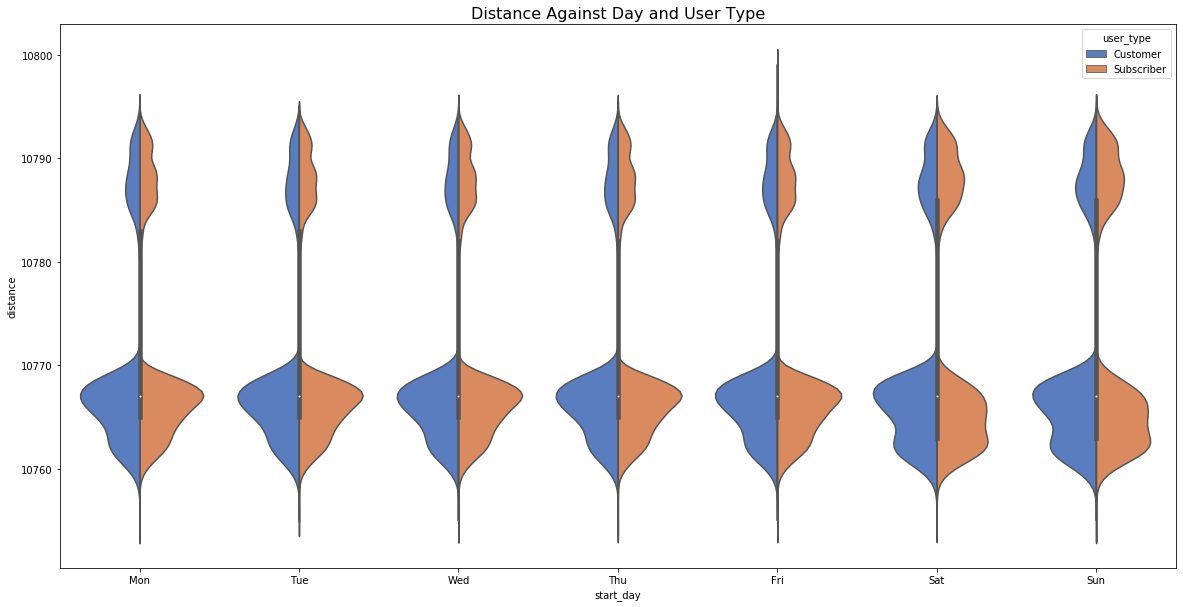

In [52]:
plt.figure(figsize = [20, 10]);

ax = sns.violinplot(data = bike_clean.query("distance <= 10784.0+ 1.5*20"), x="start_day", y="distance", hue="user_type", split=True, palette="muted")
ax.set_title('Distance Against Day and User Type', fontsize=16);

It can be seen from the above plot that customers ride longer trips compared to subscribers across all days.

#### Trip Duration Against Month and User Type

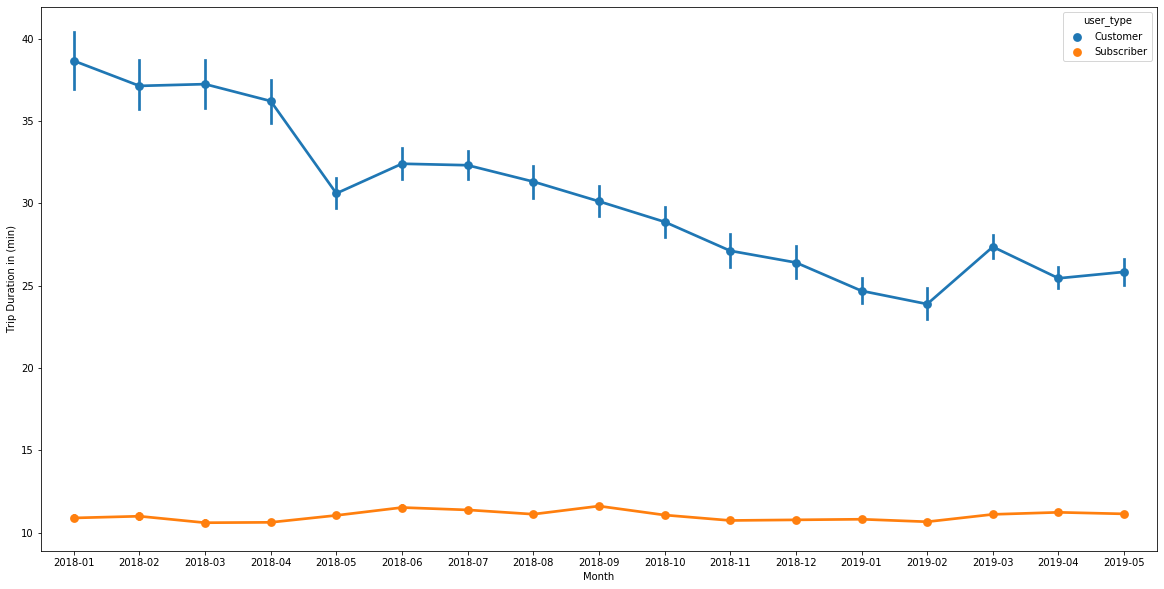

In [53]:
plt.figure(figsize = [20, 10]);

ax = sns.pointplot(x="start_time_year_month", y="duration_min", hue="user_type",
                data=bike_clean)
plt.xlabel('Month');
plt.ylabel('Trip Duration Against Month and User Type');

Usage Analysis (Jan 2018 through May 2019):
Subscribers' ride duration is comparable across all months, it is around 12 min. Customers ride longer in the frist quarter of 2018 and the it starts decreasing across all month except in November 2019

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The usage patternes between subscribers and customers in the multivariate exploration is the same as in the bivariate one. All plots strengthen the patterns discovered in the bivariate one where subscribers usage is concentrated in the workdays for commute and custommers use the system for relaxation after work and on the weekend

### Were there any interesting or surprising interactions between features?

> The interesting thing is that customers trip duration decreased drasticaly over months whereas subscribers' ride duration is comparable across all months

In [54]:
bike_clean.to_csv('master_df.csv')

References: 
- #https://www.geeksforgeeks.org/program-distance-two-points-earth/
- https://github.com/meet3012/Ford-GoBike-System-Data-Visualization/blob/master/Data-Exploration-with-Bike-Data.ipynb
- https://github.com/amiratantawy/project-5-Communicate-Data-Findings/blob/master/Exploration_Ford_GoBike_AmiraTantawy.ipynb
- https://github.com/burakgunbatan/UdacityProject---CommunicateDataFindings/blob/master/Exploration_Ford_GoBike_BurakGunbatan.ipynb
- https://github.com/nbalotaibi/Communicate-Data-Findings/blob/master/Exploration_Ford_GoBike.ipynb
- https://github.com/FarisALSaleem/Communicate-Data-Findings/blob/master/exploration_template.ipynb
- https://github.com/kzhang789/Communicate-data-findings/blob/master/fordgobike_exploration.ipynb